In [1]:
#Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
#Load files into dataframes
mouse_metadata = pd.read_csv("data/mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

In [3]:
#Next to merge the data into one dataframe 
study_metadata = pd.merge(mouse_metadata,study_results,on='Mouse ID')

In [4]:
#First up we are asked to print out a summary table of common statistics. This is easily done using .agg and groupby
stat_sum = study_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
stat_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


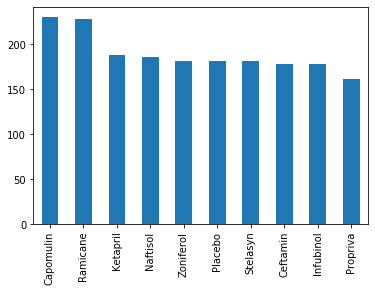

In [5]:
#Now to make a bar chart showing the relative number of datapoints for each regimen using pandas
study_metadata['Drug Regimen'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

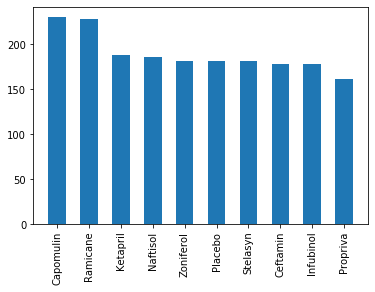

In [6]:
#We are asked to do the same but this time using pyplot. For this we need to manually create the x and y variables i guess
dr_y_axis = study_metadata['Drug Regimen'].value_counts()
dr_x_axis = dr_y_axis.index
plt.bar(dr_x_axis,dr_y_axis,width=0.55)
plt.xticks(rotation=90)

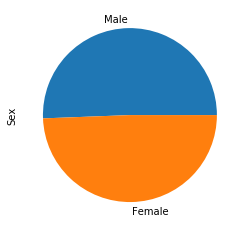

In [7]:
#Now we want to do the same general thing but with a pie chart and the split between male and female mice
study_metadata['Sex'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Sex')

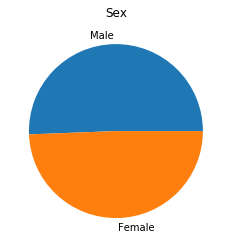

In [8]:
sx_size = study_metadata['Sex'].value_counts()
sx_labels = sx_size.index
plt.pie(sx_size, labels=sx_labels)
plt.title('Sex')

In [9]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
#First thing that needs to done is to get the final volume which should just be the volume when the timepoint is max
#This is a little trickier but rally all i need to do is groupup each mouse and find the max timepoint as the filter, then pass
#that into a new dataframe
final_vol_filter = study_metadata.groupby('Mouse ID')['Timepoint'].transform(max) == study_metadata['Timepoint']
final_vol_df = study_metadata[final_vol_filter]

#Now that i have a dataframe that is only the endpoints, i can filter for just the drugs i want
#first to set up the filters
drug_1 = final_vol_df['Drug Regimen'] == 'Capomulin'
drug_2 = final_vol_df['Drug Regimen'] == 'Ramicane'
drug_3 = final_vol_df['Drug Regimen'] == 'Infubinol'
drug_4 = final_vol_df['Drug Regimen'] == 'Ceftamin'

#then to apply the filter
final_vol_drug_df = final_vol_df[(drug_1 | drug_2 | drug_3 | drug_4)]

#Now that we have our fully filtered df, we can find the quartiles
vol_quar = final_vol_drug_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

#Now we want to find to IQR so that we can identify outliers. 
#(i'm hard coding this for now, i need to find a way to pythonically get to the values)
vol_iqr = vol_quar[.75]-vol_quar[.25]
lower_limit = vol_quar[.25] - (1.5*vol_iqr)
upper_limit = vol_quar[.75] + (1.5*vol_iqr)

#vol_iqr = 59.930262 - 37.187744
#lower_limit = 37.187744 - (1.5*vol_iqr)
#upper_limit = 59.930262 + (1.5*vol_iqr)

#With these values calculated we can set up out filters
lower_filter = final_vol_drug_df['Tumor Volume (mm3)'] < lower_limit
upper_filter = final_vol_drug_df['Tumor Volume (mm3)'] > upper_limit

#Now to create a new dataframe with just the outliers
vol_outliers_df = final_vol_drug_df[lower_filter | upper_filter]
vol_outliers_df
#since this returns an empty dataframe it looks like there are no outliers questionmark

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


c:\users\wolgy\miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\wolgy\miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\wolgy\miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\users\wolgy\miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([<matplotlib.axis.XTick at 0x194d573f780>,
 <a list of 4 Text xticklabel objects>)

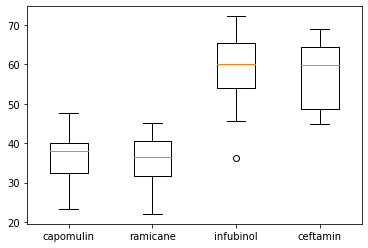

In [10]:
#Using the dataframe we created we are asked to make a box and whiskers plot
#the first thing to do is make a dataframe for each drug, the good thing is we already have the filter
capomulin_df = final_vol_drug_df[drug_1]
ramicane_df = final_vol_drug_df[drug_2]
infubinol_df = final_vol_drug_df[drug_3]
ceftamin_df = final_vol_drug_df[drug_4]

#Then we can just pass those dataframes and the correct column into a boxplot
plt.boxplot((capomulin_df['Tumor Volume (mm3)'],ramicane_df['Tumor Volume (mm3)'],
             infubinol_df['Tumor Volume (mm3)'],ceftamin_df['Tumor Volume (mm3)']))
plt.xticks([1,2,3,4],['capomulin','ramicane','infubinol','ceftamin'])
#capomulin_df


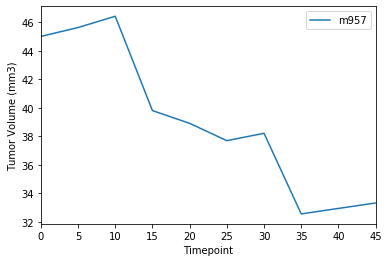

In [11]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
#using a rng I picked m957 as my mouse to track and need to filter a dataframe with just her data
m957_filter = study_metadata['Mouse ID'] == "m957"
m957_df = study_metadata[m957_filter]

#Now to plot this data
m957_df.plot('Timepoint','Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(("m957",))


The linear regression model for weight vs volume is 0.96x + 21.49
and the correlation coefficient is 0.53


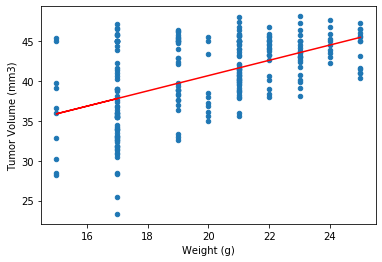

In [24]:
#for this next part we are to create a scatter plot of the weight vs tumor volume for mice on the capomulin drug
#First we need to filter the original dataframe for only the requested drug. this is different from our previous filter
capomulin_df = study_metadata[study_metadata['Drug Regimen'] == 'Capomulin']

#Next we want to find the linear regression model and correlation coefficient for these datapoints which is easy with scipy
#We ask for some additional information, uts just how this particular function works
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
print(f'The linear regression model for weight vs volume is {round(slope,2)}x + {round(intercept,2)}')
print(f'and the correlation coefficient is {round(r_value,2)}')

capomulin_df.plot.scatter('Weight (g)','Tumor Volume (mm3)')
plt.plot(capomulin_df['Weight (g)'],slope*capomulin_df['Weight (g)'] + intercept,color="red")

In [ ]:
#Write up
#Starting with the initial box plox, it's not a lot to go off from by itself. Since it is the final measurement